In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
data= pd.read_csv('Books.csv', encoding="utf-8")
data

,Unnamed: 0,_id,author,contents,publishing house,year
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904


In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
data['documents_cleaned']= data.apply(lambda row: nltk.sent_tokenize(row['contents']), axis=1)
data

,Unnamed: 0,_id,author,contents,publishing house,year,documents_cleaned
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014,[Quel giorno era impossibile uscire a passeggi...
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904,"[In quel giorno era impossibile passeggiare., ..."


In [6]:
import numpy as np
documents = list(np.array(data['documents_cleaned'][0]))
documents2 = list(np.array(data['documents_cleaned'][1]))

In [7]:
df = pd.DataFrame(documents,columns={'text'})
df2 = pd.DataFrame(documents2, columns={'text'})
df = df.append(df2)

In [8]:

tfidfvectoriser=TfidfVectorizer()
tfidfvectoriser.fit(df.text)
tfidf_vectors=tfidfvectoriser.transform(df.text)

pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray()
pairwise_differences=euclidean_distances(tfidf_vectors)

def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {df.iloc[doc_id]["text"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {df.iloc[ix]["text"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

Output streaming troncato alle ultime 5000 righe.


Document: "Ritardataria!"
Euclidean Distance : 1.4142135623730951


Document: disse.
Euclidean Distance : 1.4142135623730951


Document: "Io ardo dall'impazienza e tu mi fai aspettare tutto questo tempo!"
Euclidean Distance : 1.4142135623730951


Document: Mi condusse nella sala da pranzo, mi squadrò da capo a piedi e dichiarò che ero "bella come un giglio, e non solo l'orgoglio della sua vita, ma anche il desiderio dei suoi occhi"; poi mi disse che per fare colazione mi concedeva dieci minuti, non uno di più, e suonò il campanello.
Euclidean Distance : 1.4142135623730951


Document: "John, avete preparato la carrozza?"
Euclidean Distance : 1.4142135623730951


Document: "I bagagli sono stati portati giù?"
Euclidean Distance : 1.4142135623730951


Document: "Li stanno portando ora, signore."
Euclidean Distance : 1.4142135623730951


Document: Promettimi che andrai nella stanza dei bambini."
Euclidean Distance : 1.4142135623730951


Do

In [9]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Output streaming troncato alle ultime 5000 righe.


Document: "Ritardataria!"
Euclidean Distance : 1.4142135623730951


Document: disse.
Euclidean Distance : 1.4142135623730951


Document: "Io ardo dall'impazienza e tu mi fai aspettare tutto questo tempo!"
Euclidean Distance : 1.4142135623730951


Document: Mi condusse nella sala da pranzo, mi squadrò da capo a piedi e dichiarò che ero "bella come un giglio, e non solo l'orgoglio della sua vita, ma anche il desiderio dei suoi occhi"; poi mi disse che per fare colazione mi concedeva dieci minuti, non uno di più, e suonò il campanello.
Euclidean Distance : 1.4142135623730951


Document: "John, avete preparato la carrozza?"
Euclidean Distance : 1.4142135623730951


Document: "I bagagli sono stati portati giù?"
Euclidean Distance : 1.4142135623730951


Document: "Li stanno portando ora, signore."
Euclidean Distance : 1.4142135623730951


Document: Promettimi che andrai nella stanza dei bambini."
Euclidean Distance : 1.4142135623730951


Do

#WORD2VEC

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [11]:
#WORD2VEC
corpus_text = 'n'.join(data['contents'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [12]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5, sg=0) 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 50, window = 5, sg = 1)

In [13]:
words = model2.wv.vocab
vector = model2.wv['giorno']

In [14]:
similar = model2.wv.most_similar('giorno')
similar

[('mattina', 0.8890189528465271),
 ('mattino', 0.8806159496307373),
 ('seguente', 0.8727369904518127),
 ('anno', 0.863794207572937),
 ('durante', 0.8605728149414062),
 ('periodo', 0.8528388142585754),
 ('pomeriggio', 0.8463163375854492),
 ('grido', 0.8451504707336426),
 ('tempo', 0.8450104594230652),
 ('sera', 0.8413074016571045)]

In [15]:
model2.init_sims(replace = True)
model2.save('word2vec_model')
model = Word2Vec.load('word2vec_model')
model.wv.most_similar('giorno')

[('mattina', 0.8890189528465271),
 ('mattino', 0.8806160092353821),
 ('seguente', 0.8727369904518127),
 ('anno', 0.863794207572937),
 ('durante', 0.8605728149414062),
 ('periodo', 0.8528387546539307),
 ('pomeriggio', 0.8463163375854492),
 ('grido', 0.8451504707336426),
 ('tempo', 0.8450104594230652),
 ('sera', 0.8413074016571045)]

In [16]:
model.wv.most_similar('mattino')

[('pomeriggio', 0.9716646671295166),
 ('buio', 0.961139976978302),
 ('villaggio', 0.9582625031471252),
 ('sonno', 0.9545055031776428),
 ('tentativo', 0.9525831937789917),
 ('grido', 0.9504193663597107),
 ('seguito', 0.9495456218719482),
 ('pasto', 0.9461285471916199),
 ('termine', 0.9460703134536743),
 ('legato', 0.9455670714378357)]

In [17]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


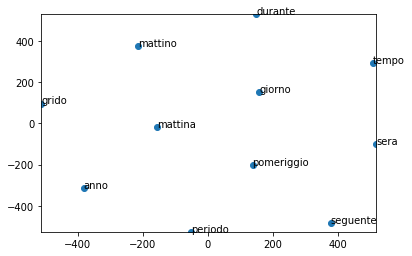

In [18]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
display_closestwords_tsnescatterplot(model, 'giorno', 50) 

#DOC2VEC

In [19]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [20]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(df.text)]

In [21]:
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [22]:
document_embeddings=np.zeros((df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

In [23]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [24]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Output streaming troncato alle ultime 5000 righe.
Document: Ogni cosa riflessa nello specchio pareva più fredda, più trista che nella realtà, e la strana creaturina che mi fissava col viso bianco, le braccia che si staccavano nell'ombra, gli occhi scintillanti e che movevasi timorosamente in quella camera silente, mi parve uno spirito, una di quelle sottili fantasime, metà fate, metà folletti, di cui Bessie parlava nelle novelle narrate la sera accanto al fuoco e che essa ci descriveva uscente dalle valli abbandonate, ove crescono le eriche per apparire dinanzi ai viaggiatori.
Cosine Similarity : 0.19812152864868976


Document: Non avevo fatto rumore, non aveva gli occhi di dietro; la sua ombra mi aveva dunque sentita!
Cosine Similarity : 0.19811563897461087


Document: E allora perché dobbiamo sempre lasciarci sopraffare dall'angoscia, quando la vita finisce in un attimo e la morte non è altro che un passaggio per la felicità, per la gloria?"
Cosine Similarity : 0.19806644586702288




In [25]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Output streaming troncato alle ultime 5000 righe.
Document: "In questo momento sono simile a un demonio, e, come mi direbbe il buon pastore, merito il più severo giudizio di Dio, merito di essere dannato alla fiamma o all'eterno verme roditore.
Euclidean Distance : 17.299962158702165


Document: Vivere in mezzo al rispetto generale, benché non fosse che il rispetto di operai e contadini, era come "stare seduti al dolce tepore del sole"; i sentimenti di serenità germogliano e fioriscono al calore di quei raggi.
Euclidean Distance : 17.302414337757995


Document: Sono sicura che gli farebbe bene parlare un po' della dolce Rosamond, che è convinto di non dover sposare.
Euclidean Distance : 17.303074178006522


Document: Le imposte della porta a vetri erano chiuse e non potevo vedere dentro; così i miei occhi e il mio spirito sembravano fuggire via da quella casa tetra, da quel buco grigio di celle cieche, verso il cielo che s'espandeva sopra di me, un mare azzurro senza macchie di nubi.
E

In [26]:
!pip install sentence_transformers

     |████████████████████████████████| 78 kB 2.7 MB/s 
     |████████████████████████████████| 2.9 MB 36.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.0 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 895 kB 38.1 MB/s 
     |████████████████████████████████| 636 kB 44.7 MB/s 
     |████████████████████████████████| 109 kB 44.8 MB/s 
     |████████████████████████████████| 546 kB 41.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=8dac18244285de7cc62bb13018d07d13c97f1d9435a89f75cd15b8c3bfa20791
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [27]:
!pip install bert

  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3766 sha256=113c6f701e072b71e2e289e9e664c91b204970c0c7d85e62dcbb6d9df9b22253
  Stored in directory: /root/.cache/pip/wheels/bb/31/1b/c05f362e347429b7436954d1a2280fe464731e8f569123a848
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6795 sha256=d25cf92680005a449d482952080bc0e699a75ff0a46cb8347321d51cc92b7b8e
  Stored in directory: /root/.cache/pip/wheels/94/f1/b4/0b98b1e94775da6a0b1130e342d22af05cd269e1172c19f40f
Successfully built bert erlastic


In [28]:
!pip install pytorch_pretrained_bert

     |████████████████████████████████| 123 kB 5.2 MB/s 
     |████████████████████████████████| 131 kB 37.3 MB/s 
     |████████████████████████████████| 8.0 MB 38.6 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 138 kB 44.4 MB/s 
     |████████████████████████████████| 127 kB 45.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


#SENT2VEC

In [29]:
import tensorflow as tf
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import random
import numpy as np
import matplotlib.pyplot as plt
import math

% matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

Found GPU at: /device:GPU:0


'Tesla K80'

In [30]:
!pip install sentence_transformers

In [31]:
from sentence_transformers import SentenceTransformer

In [32]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
document_embeddings = sbert_model.encode(data)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [34]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [35]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Output streaming troncato alle ultime 5000 righe.
Document: Gli esseri mortali non godono mai di una completa felicità nel mondo.
Cosine Similarity : 0.7771838903427124


Document: In quel tempo chiese raramente che Adele andasse da lui.
Cosine Similarity : 0.7771838903427124


Document: Io non osavo farmi trovare in difetto, mi sforzavo in ogni modo di compiere il mio dovere, ed ero considerata ribelle e irritante, musona e subdola, da mattina a pomeriggio e da pomeriggio a sera.
Cosine Similarity : 0.7771838903427124


Document: Mai non mi aveva chiamata così spesso presso di sé, mai non era stato così buono per me, e, ohimè!
Cosine Similarity : 0.7771838903427124


Document: Io non parlai, così subito riprese:

"Il mio caro fratellino ha qualche progetto ben preciso nei tuoi riguardi, ne sono sicura.
Cosine Similarity : 0.7771838903427124


Document: Vi occorre del danaro, non potete viaggiare senza e non dovete averne molto.
Cosine Similarity : 0.7771838903427124


Document: s'infe

In [36]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Output streaming troncato alle ultime 5000 righe.


Document: Borbottò qualche parola e si voltò da un'altra parte; il fumo avevalo quasi soffocato.
Euclidean Distance : 9.380228042602539


Document: Sembrava dire: 'È bello sognare, ma non devo dimenticare che i sogni non hanno nessuna attinenza con la realtà.
Euclidean Distance : 9.384346008300781


Document:  Vi parlavo delle signore che sorridevano ai signori, e ultimamente tanti sorrisi sono stati versati negli occhi del signor Rochester, che quelli ne traboccano come coppe troppo piene.
Euclidean Distance : 9.387263298034668


Document: "Terrori immaginari, signore?
Euclidean Distance : 9.387923240661621


Document:  Accettate che io abbia il diritto di farla un po' da padrone" Accettate che io possa essere qualche volta brusco ed esigente per le ragioni che vi ho esposte: prima perché ho più anni e potrei essere vostro padre; poi perché ho l'esperienza che insegna la lotta, perché ho visto da vicino molti individui e popoli, fi